# 3.3.4 Ejemplo: inferencia de un vector desconocido

**Propósito:** $\;$ predicción de un vector $\boldsymbol{z}\in\mathbb{R}^D$ a partir de $N$ medidas ruidosas independientes $\,\boldsymbol{y}=(\boldsymbol{y}_1,\dotsc,\boldsymbol{y}_N),\,\boldsymbol{y}_n\in\mathbb{R}^D$

**Prior:**
$$p(\boldsymbol{z})%
=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_z,\mathbf{\Sigma}_z)%
\quad\text{con}\quad%
\boldsymbol{\mu}_z=\boldsymbol{0}_D%
\quad\text{y}\quad%
\mathbf{\Sigma}_z=0.1\mathbf{I}_D$$

**Verosimilitud:** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}$
$$p(\boldsymbol{y}\mid\boldsymbol{z})%
=\mathcal{N}(\boldsymbol{y}\mid\mathbf{W}\boldsymbol{z},\mathbf{\Sigma}_y)%
=\prod_{n=1}^N\mathcal{N}(\boldsymbol{y}_n\mid\boldsymbol{z},\mathbf{\Sigma})%
\quad\text{con}\quad%
\mathbf{W}=[\mathbf{I}_D;\dotsc;\mathbf{I}_D]%
\quad\text{y}\quad%
\mathbf{\Sigma}_y=\operatorname{blkdiag}(\mathbf{\Sigma},\dotsc,\mathbf{\Sigma})$$

**Regla de Bayes (posterior):** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}$
$$p(\boldsymbol{z}\mid\boldsymbol{y})=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_{z|y},\mathbf{\Sigma}_{z|y})%
\quad\text{con}\quad%
\mathbf{\Sigma}_{z|y}^{-1}=\mathbf{\Sigma}_z^{-1}+\mathbf{W}^t\mathbf{\Sigma}_y^{-1}\mathbf{W}%
\quad\text{y}\quad%
\boldsymbol{\mu}_{z|y}=\mathbf{\Sigma}_{z|y}\,[\mathbf{W}^t\mathbf{\Sigma}_y^{-1}\boldsymbol{y}+\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z]$$
$$p(\boldsymbol{z}\mid\boldsymbol{y})=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_{z|y},\mathbf{\Sigma}_{z|y})%
\quad\text{con}\quad%
\mathbf{\Sigma}_{z|y}^{-1}=\mathbf{\Sigma}_z^{-1}+N\mathbf{\Sigma}^{-1}%
\quad\text{y}\quad%
\boldsymbol{\mu}_{z|y}=\mathbf{\Sigma}_{z|y}\,[\mathbf{\Sigma}^{-1}N\bar{\boldsymbol{y}}+\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z]$$

**Ejemplo:** $\;$ a priori creemos que $\boldsymbol{z}$ está cerca de $\boldsymbol{0},\,$ si bien la evidencia apunta a $\,\boldsymbol{0.5}$
$$\begin{align*}
\boldsymbol{z}&\sim\mathcal{N}(\boldsymbol{\mu}_z,\mathbf{\Sigma}_z)&&\text{con}\qquad\boldsymbol{\mu}_z=\boldsymbol{0}\quad\text{y}\quad\mathbf{\Sigma}_y=0.1\mathbf{I}\\
\boldsymbol{y}_n&\sim\mathcal{N}(\boldsymbol{z},\mathbf{\Sigma}_y)&&\text{con}\qquad\boldsymbol{z}=\boldsymbol{0.5}\quad\text{y}\quad\mathbf{\Sigma}_y=0.1\begin{pmatrix}2&1\\1&1\end{pmatrix}
\end{align*}$$

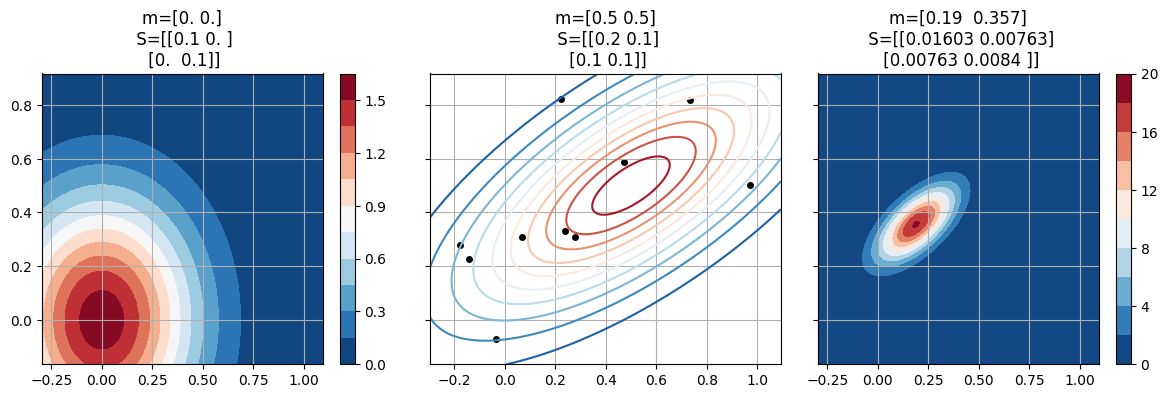

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal as mvn
mz = np.array([0.0, 0.0]); Sz = 0.1 * np.eye(2); Szi = np.linalg.inv(Sz)
N = 10; my = np.array([0.5, 0.5]); Sy = 0.1 * np.array([[2, 1], [1, 1]]); Syi = np.linalg.inv(Sy)
Y = mvn(my, Sy).rvs(N, random_state=13); mY = np.mean(Y, axis=0);
Szyi = Szi + N*Syi; Szy = np.linalg.inv(Szyi); mzy = Szy @ (Syi @ (N*mY) + Szi @ mz);
fig, axs = plt.subplots(1, 3, figsize=(12,3.5), sharey=True); fig.tight_layout()
ax = axs[1]; ax.grid(); ax.set_title(f'm={np.round(my, 2)}\n S={np.round(Sy, 3)}')
ax.scatter(*Y.T, s=16, c='k'); zoom = 1.1
x1min, x1max = ax.get_xlim(); R = (zoom-1)*(x1max-x1min)/2.0; x1min -= R; x1max += R
x2min, x2max = ax.get_ylim(); R = (zoom-1)*(x2max-x2min)/2.0; x2min -= R; x2max += R
x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
p = mvn(my, Sy).pdf(np.dstack((x1, x2))); ax.contour(x1, x2, p, 10, cmap='RdBu_r')
ax = axs[0]; ax.grid(); ax.set_title(f'm={np.round(mz, 2)}\n S={np.round(Sz, 3)}')
ax.set_xlim(x1min, x1max); p = mvn(mz, Sz).pdf(np.dstack((x1, x2)))
cp = ax.contourf(x1, x2, p, 10, cmap='RdBu_r'); plt.colorbar(cp, ax=ax)
ax = axs[2]; ax.grid(); ax.set_title(f'm={np.round(mzy, 3)}\n S={np.round(Szy, 5)}')
ax.set_xlim(x1min, x1max); p = mvn(mzy, Szy).pdf(np.dstack((x1, x2)))
cp = ax.contourf(x1, x2, p, 10, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);